## Let's look at two ways of creating a list from an existing list

Let's first create a random list upon which we further process, called `A` (with element $a_i$)

In [1]:
from math import sin, pi
import random

# We operate on a list of 1000 entries
N = 500

# Generate one dimensional list of N numbers
A = [random.uniform(1.5, 1.9) for _ in range(N)]
len(A)

500

Generate a new list from scratch, doing the operations $ b_i = a^2_1 + \sin\left(\frac{a_i \cdot \pi}{2}\right)$ to create a list `B`

In [3]:
def list_from_scratch(old_list):
    """ Generates new list from scratch
    """
    new_list = []
    for elem in old_list:
        new_list.append(elem ** 2 + 24.0 * (elem * pi * 0.5))
        
    return new_list

Wait. That doesn't look fair. Shouldn't we preallocate the list and just refer the indices?

In [4]:
def preallocated_list_from_scratch(old_list):
    """ Generates new list from scratch, but be
    merciful and preallocate it
    """
    new_list = [None] * len(old_list)
    for idx, elem in enumerate(old_list):
        new_list[idx] = elem ** 2 + 24.0 * (elem * pi * 0.5)
        
    return new_list

We now do the same thing but with list comprehension

In [5]:
def list_from_comprehension(old_list):
    """ Generates new list using comprehension
    """
    return [elem ** 2 + 24.0 * (elem * pi * 0.5) for elem in old_list]

## Now for the interesting part. Let's time it!

In [6]:
%timeit list_from_scratch(A)

129 µs ± 6.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit preallocated_list_from_scratch(A)

121 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit list_from_comprehension(A)

98.8 µs ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Vary problem size and see what happens?

In [68]:
import pylab as plt
import seaborn as sns
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
from timeit import default_timer

scratch_time = []
prealloc_time = []
compr_time = []

for N in range(0, 26):
    A = [random.uniform(1.5, 1.9) for _ in range(2**N)]    

    # Very bad timing experiment as I conduct only one

    # Count scratch time
    time = default_timer()
    list_from_scratch(A)
    time = default_timer() - time
    scratch_time.append(time)

    # Count prealloca time
    time = default_timer()
    preallocated_list_from_scratch(A)
    time = default_timer() - time
    prealloc_time.append(time)

    # Count compregension time
    time = default_timer()
    list_from_comprehension(A)
    time = default_timer() - time
    compr_time.append(time)

Plot the data using matplotlib...(we'll get to this very soon)

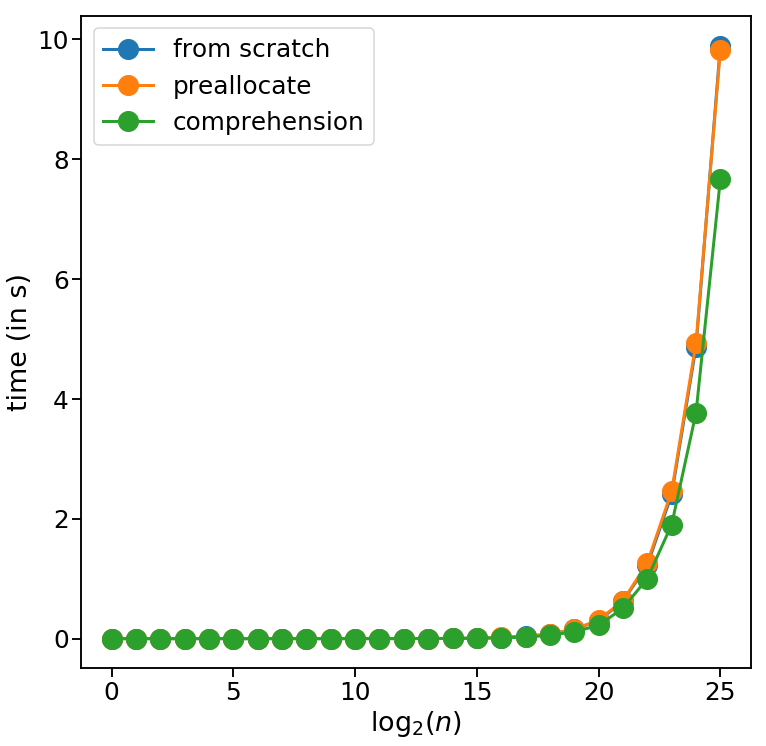

In [72]:
%matplotlib inline
plt.figure(figsize=(12,12))
plt.plot(scratch_time,'-o', lw=3, ms=20, label='from scratch')
plt.plot(prealloc_time,'-o', lw=3, ms=20, label='preallocate')
plt.plot(compr_time,'-o', lw=3, ms=20, label='comprehension')

ax = plt.gca()

ax.set_xlabel(r'$\log_2(n)$')
ax.set_ylabel('time (in s)')
plt.legend()

## For people familiar with `Python`, you can see the disassembly

In [73]:
import dis

dis.dis(list_from_scratch)

  4           0 BUILD_LIST               0
              2 STORE_FAST               1 (new_list)

  5           4 SETUP_LOOP              42 (to 48)
              6 LOAD_FAST                0 (old_list)
              8 GET_ITER
        >>   10 FOR_ITER                34 (to 46)
             12 STORE_FAST               2 (elem)

  6          14 LOAD_FAST                1 (new_list)
             16 LOAD_METHOD              0 (append)
             18 LOAD_FAST                2 (elem)
             20 LOAD_CONST               1 (2)
             22 BINARY_POWER
             24 LOAD_CONST               2 (24.0)
             26 LOAD_FAST                2 (elem)
             28 LOAD_GLOBAL              1 (pi)
             30 BINARY_MULTIPLY
             32 LOAD_CONST               3 (0.5)
             34 BINARY_MULTIPLY
             36 BINARY_MULTIPLY
             38 BINARY_ADD
             40 CALL_METHOD              1
             42 POP_TOP
             44 JUMP_ABSOLUTE           10
        

In [74]:
dis.dis(preallocated_list_from_scratch)

  5           0 LOAD_CONST               1 (None)
              2 BUILD_LIST               1
              4 LOAD_GLOBAL              0 (len)
              6 LOAD_FAST                0 (old_list)
              8 CALL_FUNCTION            1
             10 BINARY_MULTIPLY
             12 STORE_FAST               1 (new_list)

  6          14 SETUP_LOOP              48 (to 64)
             16 LOAD_GLOBAL              1 (enumerate)
             18 LOAD_FAST                0 (old_list)
             20 CALL_FUNCTION            1
             22 GET_ITER
        >>   24 FOR_ITER                36 (to 62)
             26 UNPACK_SEQUENCE          2
             28 STORE_FAST               2 (idx)
             30 STORE_FAST               3 (elem)

  7          32 LOAD_FAST                3 (elem)
             34 LOAD_CONST               2 (2)
             36 BINARY_POWER
             38 LOAD_CONST               3 (24.0)
             40 LOAD_FAST                3 (elem)
             42 LOAD_GLOBA

In [75]:
dis.dis(list_from_comprehension)

  4           0 LOAD_CONST               1 (<code object <listcomp> at 0x1031dbe40, file "<ipython-input-64-60d88a7fc980>", line 4>)
              2 LOAD_CONST               2 ('list_from_comprehension.<locals>.<listcomp>')
              4 MAKE_FUNCTION            0
              6 LOAD_FAST                0 (old_list)
              8 GET_ITER
             10 CALL_FUNCTION            1
             12 RETURN_VALUE

Disassembly of <code object <listcomp> at 0x1031dbe40, file "<ipython-input-64-60d88a7fc980>", line 4>:
  4           0 BUILD_LIST               0
              2 LOAD_FAST                0 (.0)
        >>    4 FOR_ITER                28 (to 34)
              6 STORE_FAST               1 (elem)
              8 LOAD_FAST                1 (elem)
             10 LOAD_CONST               0 (2)
             12 BINARY_POWER
             14 LOAD_CONST               1 (24.0)
             16 LOAD_FAST                1 (elem)
             18 LOAD_GLOBAL              0 (pi)
           